<a href="https://colab.research.google.com/github/Atharva0501/EDA_on_AI-ML-DS_jobs/blob/main/EDAaidsjobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPLORATORY DATA ANALYSIS OF AI&DS JOBS 
# Source of Dataset 


1.   The below dataset was collected from kaggle. It contain information about salaries of various job roles in the field of Artificial intelligence and data science in different countries.
2.   The Dataset is stored on google drive,so we import the dataset from the same.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Atharva/ds_salaries.csv"
dataframe = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataframe = dataframe.drop(dataframe.columns[0], axis = 1)

In [ ]:
dataframe.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


-> Before getting into the analysis part let us first explore our dataset first. so here are the columns present in the data set.

In [ ]:
dataframe.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


#Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


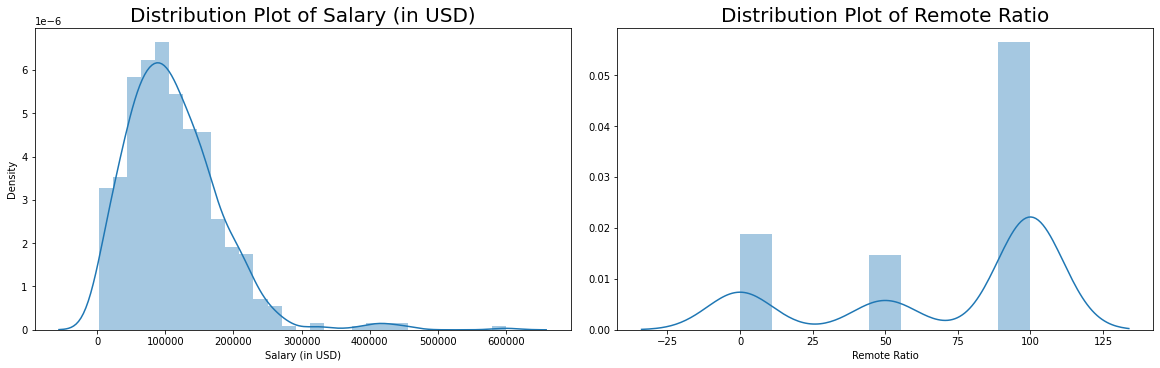

In [ ]:
def plot_dist_plot():
    single_item_dimensions = (8, 5)
    numerical_variables = ["salary_in_usd", "remote_ratio"]
    numerical_actual_value = ["Salary (in USD)", "Remote Ratio"]
    nrow = 1
    ncol = len(numerical_variables)
    fig, axes = plt.subplots(nrow, ncol, constrained_layout=True, figsize=(single_item_dimensions[0] * ncol, single_item_dimensions[1] * nrow))
    for i in range(nrow):
        for j in range(ncol):
            x = j
            sns.distplot(a=dataframe[numerical_variables[x]].values, ax=axes[j])
            axes[j].set_xlabel(numerical_actual_value[x])
            axes[j].set_ylabel("Density" if j == 0 else "")
            axes[j].set_title(f"Distribution Plot of {numerical_actual_value[x]}", fontdict={"fontsize": 20})
plot_dist_plot()



#Conclusion


1.   The data science salaries form a positively skewed distribution 
2.   The remote ratio distribution of 100% remote work has highest peak, describing that most of the jobs were remote.



#Bivariate Analysis
Now, Lets take mean of the TOP 5 MOST OFFERED JOB PROFILES and compare it with the mean of the entire AI&DS field.

In [ ]:
dataframe['job_title'].value_counts()[0:5]

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: job_title, dtype: int64

In [ ]:
dataframe['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [ ]:
da = dataframe.loc[(dataframe['experience_level'] == 'EN')]
da.salary_in_usd.mean()


61643.318181818184

In [ ]:
da = dataframe.loc[(dataframe['experience_level'] == 'EN') & (dataframe['job_title'] == 'Data Scientist')]
da.salary_in_usd.mean()

55330.90909090909

In [ ]:
da = dataframe.loc[(dataframe['experience_level'] == 'EN') & (dataframe['job_title'] == 'Data Engineer')]
da.salary_in_usd.mean()

58933.5

In [ ]:
da = dataframe.loc[(dataframe['experience_level'] == 'EN') & (dataframe['job_title'] == 'Data Analyst')]
da.salary_in_usd.mean()

53960.666666666664

In [ ]:
da = dataframe.loc[(dataframe['experience_level'] == 'EN') & (dataframe['job_title'] == 'Machine Learning Engineer')]
da.salary_in_usd.mean()

86996.33333333333

In [ ]:
da = dataframe.loc[(dataframe['experience_level'] == 'EN') & (dataframe['job_title'] == 'Research Scientist')]
da.salary_in_usd.mean()

86132.0

Text(0.5, 1.0, ' salary in USD v/s Job Titles(for Entry level)')

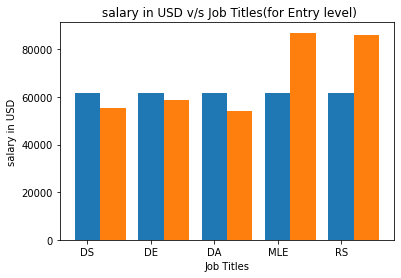

In [ ]:
import numpy as np
w=0.4
x =["DS","DE","DA","MLE","RS"]
domain = [61643,61643,61643,61643,61643]
mean =[55330,58933,53960,86996,86132]
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]

plt.bar(bar1,domain,w,label="domain")
plt.bar(bar2,mean,w,label="mean")
plt.xticks(bar1,x)
plt.xlabel('Job Titles')
plt.ylabel('salary in USD')
plt.title(' salary in USD v/s Job Titles(for Entry level)')

#Conclusion 
we can observe that Machine Learning engineer and Research scientist, these two job roles have the highest mean salary.  

#Multivariate Analysis

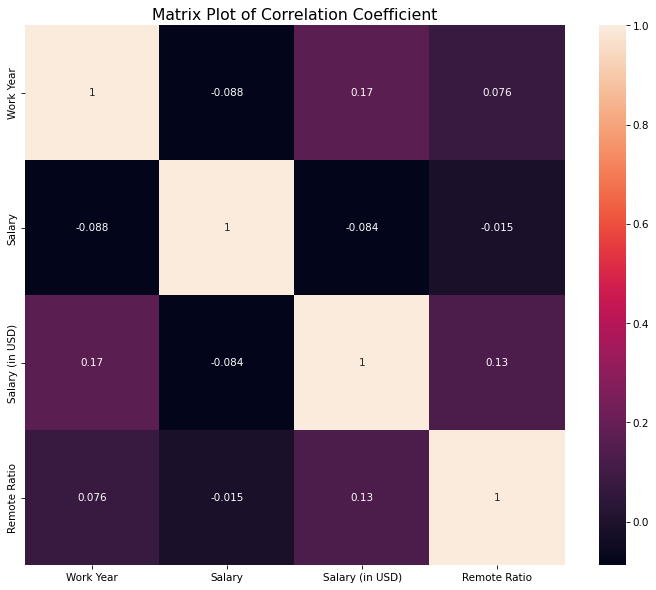

In [ ]:
def plot_heatmap():
    corr_df = dataframe.corr()
    fig = plt.figure(figsize=(10, 8), dpi = 75)
    axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
    tick_values = ["Work Year", "Salary", "Salary (in USD)", "Remote Ratio"]
    sns.heatmap(corr_df, ax=axes, annot=True, xticklabels = tick_values, yticklabels = tick_values)
    axes.set_title("Matrix Plot of Correlation Coefficient", fontdict={"fontsize": 15})
    plt.show()
plot_heatmap()

#CONCLUSION :
Salary (in USD) as well as Remote Ratio are positively correlated which can be seen from the above plot.




In [ ]:
!jupyter nbconvert --to html EDAaidsjobs.ipynb

[NbConvertApp] Converting notebook EDAaidsjobs.ipynb to html
[NbConvertApp] Writing 398045 bytes to EDAaidsjobs.html
